In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [17]:
# NKT w/o MZI
df_no_MZI = pd.read_csv('NKT laser data/NKT_ConstructiveInterference.csv')

# w/ piezo
df_piezo = pd.read_csv('NKT laser data/NKT_PhaseScan_100Hz.csv')

# Name columns 1 time and column 2 amplitude
df_no_MZI.columns = ['time', 'volt']
df_piezo.columns = ['time', 'volt']

df_no_MZI = df_no_MZI[1:]
df_piezo = df_piezo[1:]

In [13]:
df_piezo

,time,volt
1,-2.500000000000e-002,1.70729e-001
2,-2.499457499125e-002,1.70729e-001
3,-2.498914998250e-002,1.67382e-001
4,-2.498372497375e-002,1.67382e-001
5,-2.497829996500e-002,1.74077e-001
...,...,...
9212,2.496975559625e-002,1.90813e-001
9213,2.497518060500e-002,1.87466e-001
9214,2.498060561375e-002,1.87466e-001
9215,2.498603062250e-002,1.87466e-001


In [18]:
df_no_MZI['time'] = df_no_MZI['time'].astype(float)
df_no_MZI['volt'] = df_no_MZI['volt'].astype(float)

df_piezo['time'] = df_piezo['time'].astype(float)
df_piezo['volt'] = df_piezo['volt'].astype(float)

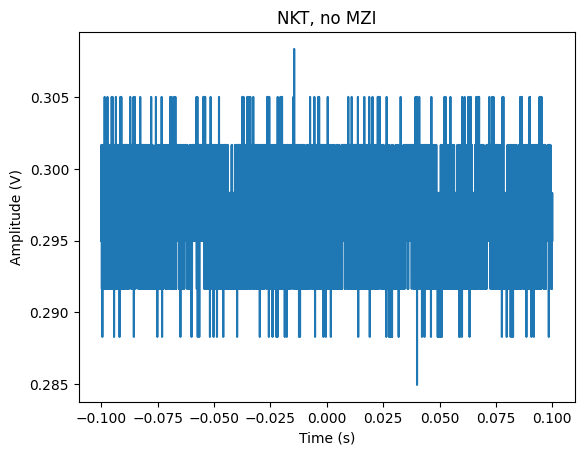

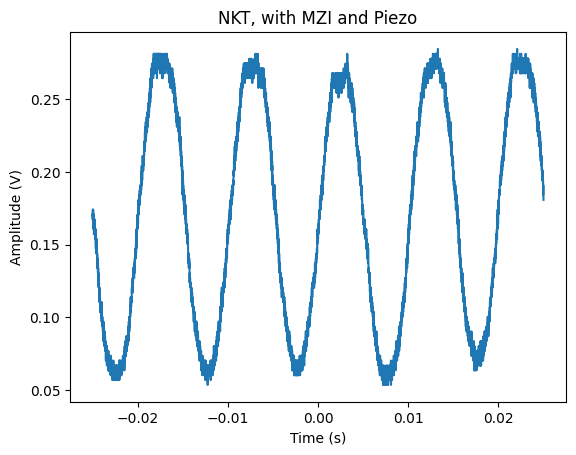

In [22]:
# FFT
fft_data_no_MZI = np.fft.rfft(pd.to_numeric(df_no_MZI['volt'].values))
fft_data_w_MZI_piezo = np.fft.rfft(pd.to_numeric(df_piezo['volt'].values))

dt = pd.to_numeric(df_no_MZI['time'].values[1]) - pd.to_numeric(df_no_MZI['time'].values[0])
dt_piezo = pd.to_numeric(df_piezo['time'].values[1]) - pd.to_numeric(df_piezo['time'].values[0])

freq = np.fft.rfftfreq(len(df_piezo['time']), dt)
freq_piezo = np.fft.rfftfreq(len(df_piezo['time']), dt_piezo)

# Plot
plt.figure()
plt.plot(pd.to_numeric(df_no_MZI['time'].values), pd.to_numeric(df_no_MZI['volt'].values))
plt.title('NKT, no MZI')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

plt.figure()
plt.plot(pd.to_numeric(df_piezo['time'].values), pd.to_numeric(df_piezo['volt'].values))
plt.title('NKT, with MZI and Piezo')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()





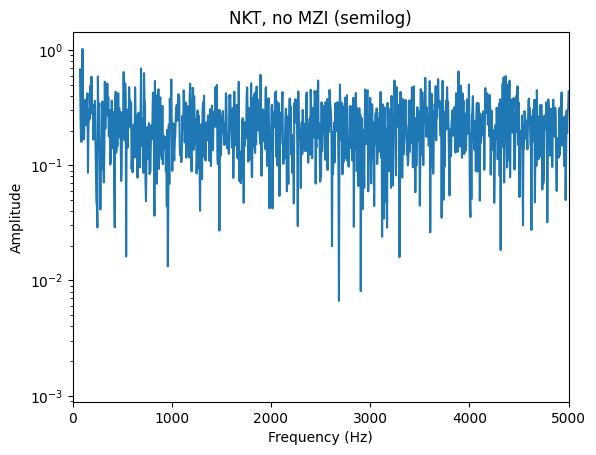

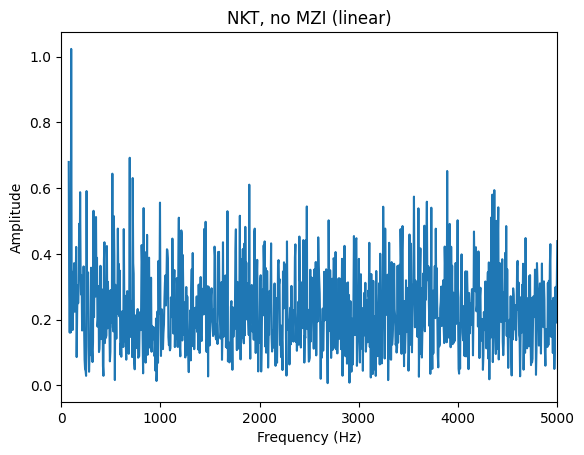

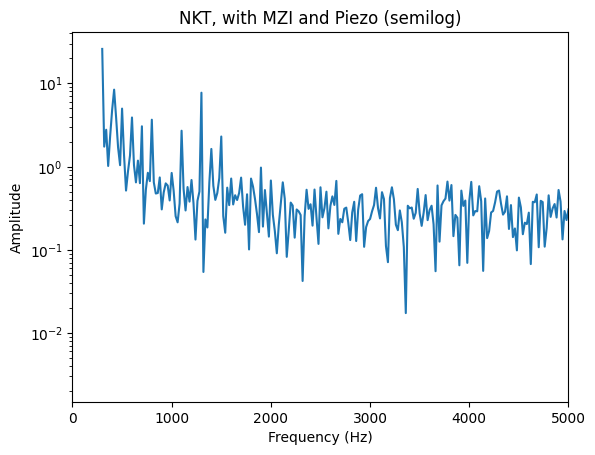

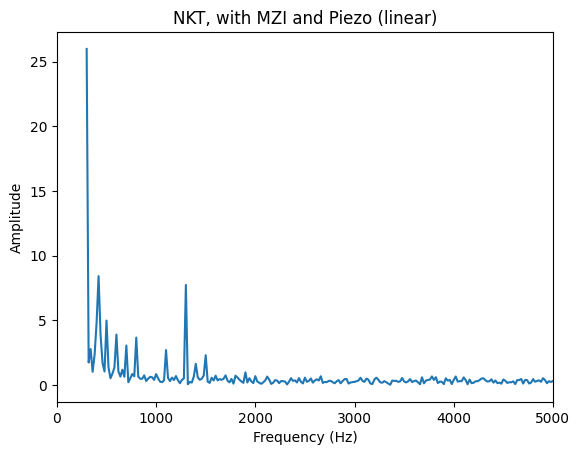

In [21]:
cut_off = 15

# Plot FFT for no MZI
plt.figure()
plt.semilogy(freq[cut_off:], np.abs(fft_data_no_MZI)[cut_off:])
plt.title('NKT, no MZI (semilog)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Linear
plt.figure()
plt.plot(freq[cut_off:], np.abs(fft_data_no_MZI)[cut_off:])
plt.title('NKT, no MZI (linear)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Plot FFT for w MZI and piezo
plt.figure()
plt.semilogy(freq_piezo[cut_off:], np.abs(fft_data_w_MZI_piezo)[cut_off:])
plt.title('NKT, with MZI and Piezo (semilog)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Linear
plt.figure()
plt.plot(freq_piezo[cut_off:], np.abs(fft_data_w_MZI_piezo)[cut_off:])
plt.title('NKT, with MZI and Piezo (linear)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()




# Limition of frequency in FFT arises from Nyquist theorem. The sampling rate is 1/dt. The highest frequency that can be resolved is 1/(2*dt) = 1/(2*0.00005) = 10000 Hz